# Portfolio 2: Analysing COVID-19 Data

The issue of COVID-19 is a hot topic for everyone needs to know, and I will analyze the live data to let everyone know about the trend. Basically, I will discuss which country has tried to ease the epidemic.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

## Loading the Data form Github

The first step is to get a copy of the raw data.  
The data is being made available by Johns Hopkins University in [this GitHub repository](https://github.com/CSSEGISandData/COVID-19). 

Load the live dataset, assumes a working network connection

In [2]:
covid_data_url = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
covid = pd.read_csv(covid_data_url)

Wach the dataframe

In [3]:
covid.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1828,1939,2171,2335,2469,2704,2894,3224,3392,3563
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,750,766,773,782,789,795,803,820,832,842
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,3649,3848,4006,4154,4295,4474,4648,4838,4997,5182
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,743,743,745,745,747,748,750,751,751,752
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,27,27,27,30,35,35,35,36,36,36


# Group states into country, and drop the Latitude and longitude column

In [4]:
df = covid.groupby('Country/Region').sum()
df2 = df.drop(columns=['Lat', 'Long'])
df2.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1828,1939,2171,2335,2469,2704,2894,3224,3392,3563
Albania,0,0,0,0,0,0,0,0,0,0,...,750,766,773,782,789,795,803,820,832,842
Algeria,0,0,0,0,0,0,0,0,0,0,...,3649,3848,4006,4154,4295,4474,4648,4838,4997,5182
Andorra,0,0,0,0,0,0,0,0,0,0,...,743,743,745,745,747,748,750,751,751,752
Angola,0,0,0,0,0,0,0,0,0,0,...,27,27,27,30,35,35,35,36,36,36


# Watch the number of confirmed cases in a country (Afghanistan) 

Text(0, 0.5, 'The Number Of Infection')

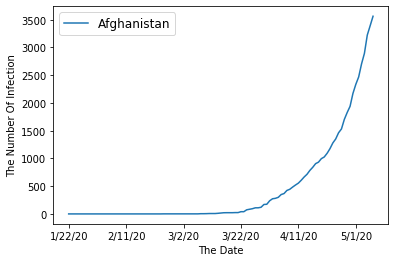

In [5]:
df2.loc['Afghanistan'].plot()
plt.legend(['Afghanistan'], prop={'size': 12})
plt.xlabel('The Date')
plt.ylabel('The Number Of Infection')

## Comparing Countries

One of the classic displays in the news is the comparison between countries.  Select a number of countries and plot their data on the same graph to reproduce this visualisation. Suitable countries would be those who have significant outbreaks - China, USA, Italy, UK, Australia. 

Text(0, 0.5, 'The Number Of Infection')

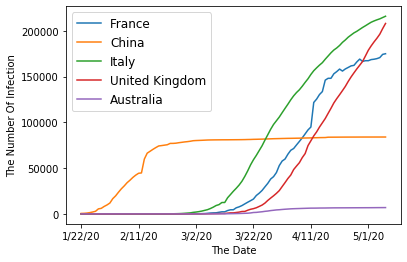

In [6]:
df2.loc['France'].plot()
df2.loc['China'].plot()
df2.loc['Italy'].plot()
df2.loc['United Kingdom'].plot()
df2.loc['Australia'].plot()
plt.legend(['France', 'China', 'Italy', 'United Kingdom', 'Australia'], prop={'size': 12})
plt.xlabel('The Date')
plt.ylabel('The Number Of Infection')

In this plot, we can know that France, Italy, and UK still have significant outbreak. 

# Check the trend on the place I live

Aligned from the time that Australia have 100 confirmed cases. The time series after the value is greater than or equal to 100 and then plot this starting at 0 on the x-axis. 

In [7]:
from matplotlib.ticker import MaxNLocator
MIN_CASES = 100
country = 'Australia'

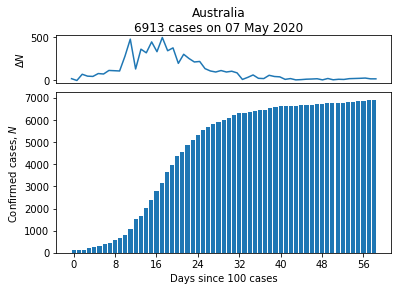

In [8]:
def make_plot(country):
    """Make the bar plot of case numbers and change in numbers line plot."""

    # Extract the Series corresponding to the case numbers for country.
    c_df = df2.loc[country, df2.columns[1:]]
    # Discard any columns with fewer than MIN_CASES.
    c_df = c_df[c_df >= MIN_CASES].astype(int)
    # Convet index to a proper datetime object
    c_df.index = pd.to_datetime(c_df.index)
    n = len(c_df)
    if n == 0:
        print('Too few data to plot: minimum number of cases is {}'
                .format(MIN_CASES))
        sys.exit(1)

    fig = plt.Figure()

    # Arrange the subplots on a grid: the top plot (case number change) is
    # one quarter the height of the bar chart (total confirmed case numbers).
    ax2 = plt.subplot2grid((4,1), (0,0))
    ax1 = plt.subplot2grid((4,1), (1,0), rowspan=3)
    ax1.bar(range(n), c_df.values)
    # Force the x-axis to be in integers (whole number of days) in case
    # Matplotlib chooses some non-integral number of days to label).
    ax1.xaxis.set_major_locator(MaxNLocator(integer=True))

    c_df_change = c_df.diff()
    ax2.plot(range(n), c_df_change.values)
    ax2.set_xticks([])

    ax1.set_xlabel('Days since {} cases'.format(MIN_CASES))
    ax1.set_ylabel('Confirmed cases, $N$')
    ax2.set_ylabel('$\Delta N$')

    # Add a title reporting the latest number of cases available.
    title = '{}\n{} cases on {}'.format(country, c_df[-1],
                c_df.index[-1].strftime('%d %B %Y'))
    plt.suptitle(title)

make_plot(country)
plt.show()

In this plot, we can know that the COVID-19 has been eased in Australia.

## Try to know which country has the high density per millon

I choose the sources of data [datahub.io](https://datahub.io/JohnSnowLabs/population-figures-by-country) has data per country up to 2016 in a handy CSV format.

Read the dataset for popluation.

In [9]:
df = pd.read_csv('/Users/garyhsu/portfolio-CHIAHAOHSU-byte/portfolio 2 data/population-figures-by-country-csv_csv.csv')
df.head()

,Country,Country_Code,Year_1960,Year_1961,Year_1962,Year_1963,Year_1964,Year_1965,Year_1966,Year_1967,...,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016
0,Aruba,ABW,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,...,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822
1,Afghanistan,AFG,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,10152331.0,10372630.0,...,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032
2,Angola,AGO,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,6309770.0,6414995.0,...,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463
3,Albania,ALB,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,...,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101
4,Andorra,AND,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,...,82683.0,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281


Choose the recent year, and group the data by countries.

In [10]:
df['Population(million)']=df['Year_2016']/1000000
df=df[['Country','Population(million)']]
df=df.groupby('Country').sum()

Merge the two dataset

In [11]:
result = pd.merge(df2, df, left_index=True, right_index=True, how='outer')
result.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,Population(million)
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1939.0,2171.0,2335.0,2469.0,2704.0,2894.0,3224.0,3392.0,3563.0,34.656032
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,766.0,773.0,782.0,789.0,795.0,803.0,820.0,832.0,842.0,2.876101
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3848.0,4006.0,4154.0,4295.0,4474.0,4648.0,4838.0,4997.0,5182.0,40.606052
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.055599
Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,743.0,745.0,745.0,747.0,748.0,750.0,751.0,751.0,752.0,0.077281


Drop the null value.

In [12]:
result=result.dropna()

Make a new colmun for calculating the density.

In [13]:
result['number of cases per million people']=result['4/20/20']/result['Population(million)']

Drop the NA value, and show the top5 countries have high density in confirmed cases.

In [14]:
result.sort_values(by=['number of cases per million people'], ascending=False).head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,Population(million),number of cases per million people
San Marino,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,569.0,580.0,580.0,582.0,582.0,589.0,608.0,622.0,0.033203,13914.405325
Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,745.0,745.0,747.0,748.0,750.0,751.0,751.0,752.0,0.077281,9277.830256
Luxembourg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3784.0,3802.0,3812.0,3824.0,3828.0,3840.0,3851.0,3859.0,0.582972,6103.209074
Iceland,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1797.0,1798.0,1798.0,1799.0,1799.0,1799.0,1799.0,1801.0,0.334252,5304.381126
Spain,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,213435.0,213435.0,216582.0,217466.0,218011.0,219329.0,220325.0,221447.0,46.443959,4310.786684


Because the San Marino do not have much more people in population, if someone was confirmed, the rate will increase sharply.

## A Predictive Model


The spread of the virus follows an exponential pattern:$y = e^{mx}$.

Now we can make a test for each country have ease the COVID 19 or not, so we can transform the equation on both side :$log(y) = mx$.

We can look the plot and R^2.

I will take the example for US and China, and also check if China had not acted to stop the virus, how many cases would there be now according to this simple model? 

Transpose the dataset, because I want to check each country case by case.

In [15]:
df2.T
df2=df2.T
df2.shape

(107, 187)

Create a new colmun for the number of day. 

In [16]:
df2.insert(0, 'Day', range(1, 1+ len(df2)))

Make sure the colmun is fit in dataset.

In [17]:
df2.head()

Country/Region,Day,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
1/22/20,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/24/20,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/25/20,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/26/20,5,0,0,0,0,0,0,0,0,4,...,0,0,0,0,2,0,0,0,0,0


y = x * [0.1544084] + -0.3749612348591649
MSE: 1.2436198135387528
R Squared: 0.9481584077652104


Text(0, 0.5, 'log(The Number Of Infection)')

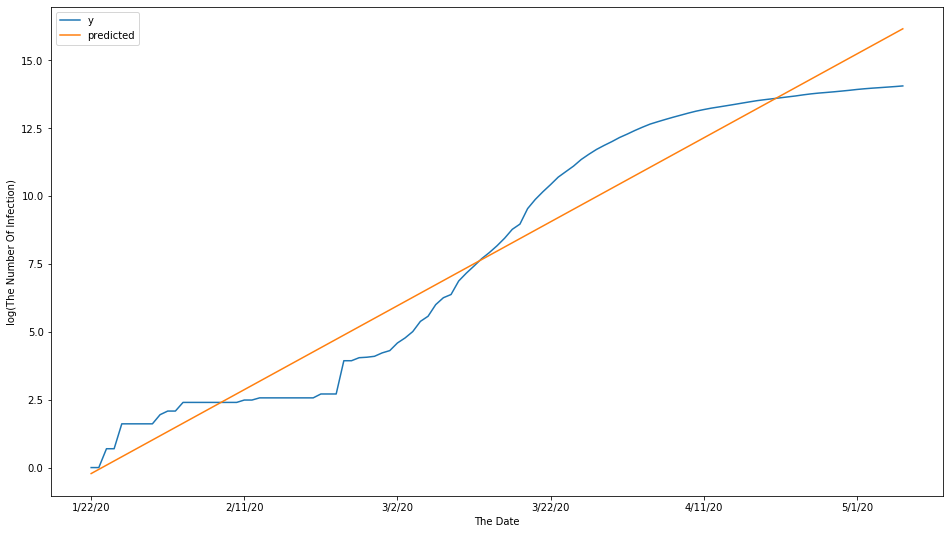

In [18]:
reg_US = linear_model.LinearRegression()
X = df2[['Day']]
y = np.log(df2['US'])
reg_US.fit(X, y)
print("y = x *", reg_US.coef_, "+", reg_US.intercept_)

predicted = reg_US.predict(X)
mse = ((np.array(y)-predicted)**2).sum()/len(y)
r2_US = r2_score(y, predicted)
print("MSE:", mse)
print("R Squared:", r2_US)
plt.figure(figsize=(16, 9))
y.plot()
plt.plot(predicted)
plt.legend(['y', 'predicted'])
plt.xlabel('The Date')
plt.ylabel('log(The Number Of Infection)')

In this plot, we can realize that the COVID 19 has been eased in US.

y = x * [0.02247333] + 9.641574779242703
MSE: 0.7028849905716241
R Squared: 0.4066995374746346
------------------------------------------------------------------
Prediction confirmed cases are 170454.0
Actual confirmed cases are      83975.0
The difference if China had not acted to stop the virus are 86479.0


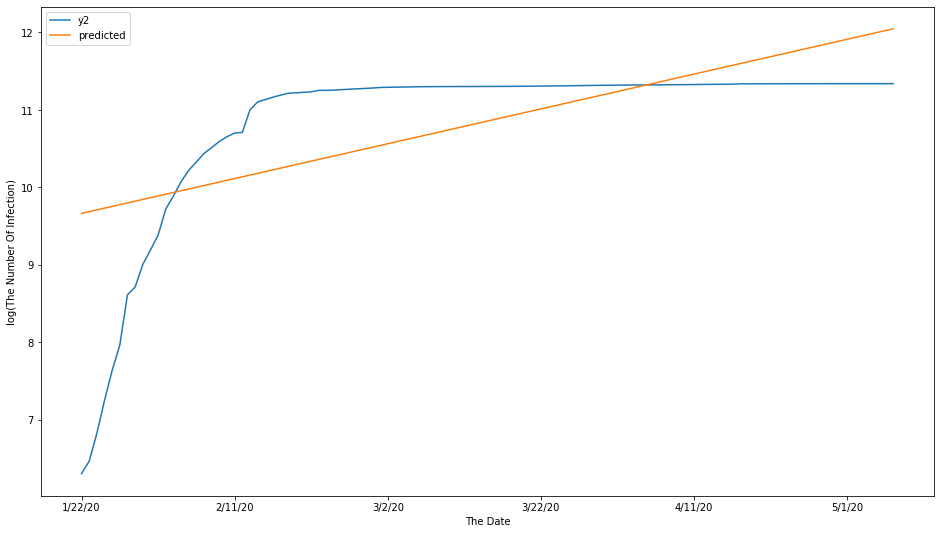

In [19]:
reg_China = linear_model.LinearRegression()
X2 = df2[['Day']]
y2 = np.log(df2['China'])
reg_China.fit(X2, y2)
print("y = x *", reg_China.coef_, "+", reg_China.intercept_)

predicted = reg_China.predict(X2)
mse = ((np.array(y2)-predicted)**2).sum()/len(y2)
r2_China = r2_score(y2, predicted)
print("MSE:", mse)
print("R Squared:", r2_China)
plt.figure(figsize=(16, 9))
y2.plot()
plt.plot(predicted)
plt.legend(['y2', 'predicted'])
plt.xlabel('The Date')
plt.ylabel('log(The Number Of Infection)')

print("------------------------------------------------------------------")
prediction_confirmed_cases=round(np.exp(predicted[-1]))
actual_confirmed_cases=round(np.exp(y2[-1]))
difference=prediction_confirmed_cases-actual_confirmed_cases

print("Prediction confirmed cases are",round(prediction_confirmed_cases))
print("Actual confirmed cases are     ",round(actual_confirmed_cases))
print("The difference if China had not acted to stop the virus are",round(difference))

In this plot, it is clear that China try their best to ease COVID 19.

If China do not ease the COVID 19, there would have extra 86479 confirmed cases. 